Linear Regression with  birth_rate_2010.txt


In [1]:
!wget https://github.com/chiphuyen/stanford-tensorflow-tutorials/blob/master/examples/data/birth_life_2010.txt

--2018-06-05 20:38:48--  https://github.com/chiphuyen/stanford-tensorflow-tutorials/blob/master/examples/data/birth_life_2010.txt
Resolving github.com (github.com)... 192.30.255.113, 192.30.255.112
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘birth_life_2010.txt’

birth_life_2010.txt     [ <=>                ]  76.59K  --.-KB/s    in 0.07s   

2018-06-05 20:38:49 (1.09 MB/s) - ‘birth_life_2010.txt’ saved [78433]



In [63]:
! git clone https://github.com/chiphuyen/stanford-tensorflow-tutorials.git

Cloning into 'stanford-tensorflow-tutorials'...
remote: Counting objects: 635, done.
remote: Total 635 (delta 0), reused 0 (delta 0), pack-reused 635
Receiving objects: 100% (635/635), 15.85 MiB | 27.69 MiB/s, done.
Resolving deltas: 100% (274/274), done.


In [70]:
ls

abstracts.txt  birth_life_2010.txt  trump_tweets.txt


In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision


In [0]:
import torch
from torch.utils.data import Dataset, DataLoader

Logistic regression with MNIST

In [0]:
import numpy as np
from io import BytesIO

In [0]:
fp = 'birth_life_2010.txt'

In [0]:
data = np.genfromtxt('birth_life_2010.txt', delimiter='\t',usecols=(1,2), skip_header=1)

In [96]:
data[1]

array([ 3.869    , 70.8194878])

In [0]:
#Todo: Restructure the class
class myData(Dataset):
  def __init__(self):
#      self.len = train_x.shape[0]
      data, n_sample = read_birth_life_data(datafile)
      # convert to torch tensor
      self.x_data = torch.from_numpy(data[:,0]).float()
      self.y_data = torch.from_numpy(data[:,1]).float()
      
  
  def __getitem__(self,index):
      return self.x_data[index], self.y_data[index]
    
  def __len__(self):
      return self.len

In [0]:
myDataInstance = myData()

In [176]:
Nigeria = data[159]
print(Nigeria)
print(data.shape)

[ 5.525      51.41002439]
(190, 2)


In [156]:
China = data[21]
print(China)

[ 1.108      82.87804878]


In [0]:
India = data[21]
print(India)

In [162]:
Japan = data[19]
print(Japan)

[ 1.39       82.93268293]


In [0]:
import matplotlib.pyplot as plt

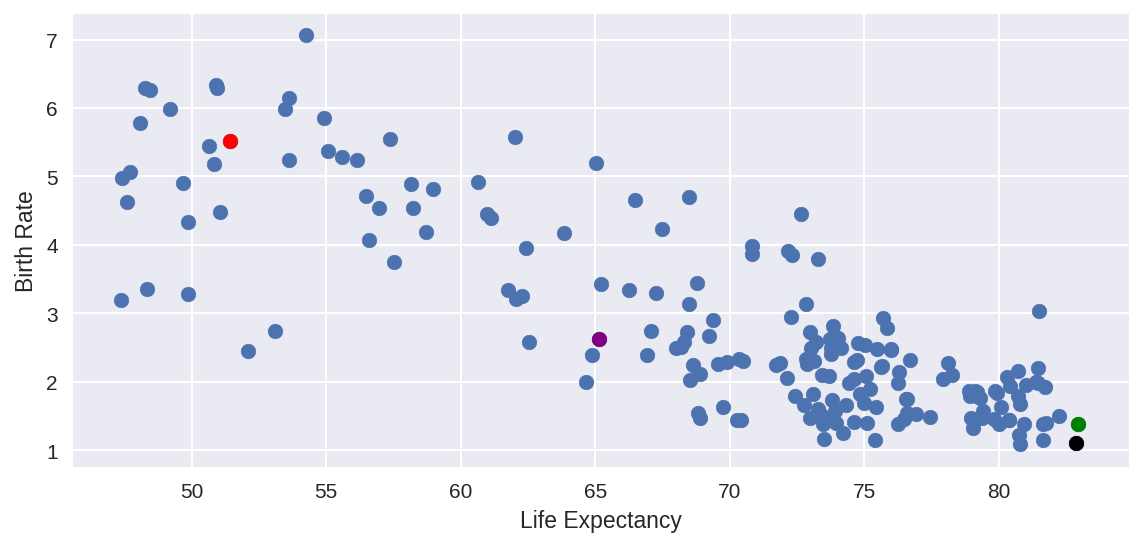

In [179]:

# Plotting example dataset# Plottin 
plt.figure(figsize = (20,4),dpi=150)
plt.subplot(121)
plt.scatter(myDataInstance.y_data,myDataInstance.x_data)

# Country with data
plt.scatter(myDataInstance.y_data[159],myDataInstance.x_data[159], color='red') # Nigeria
plt.scatter(myDataInstance.y_data[21],myDataInstance.x_data[21], color='black') # China
plt.scatter(myDataInstance.y_data[141],myDataInstance.x_data[141], color='purple') # India
plt.scatter(myDataInstance.y_data[19],myDataInstance.x_data[19], color='green') # Japan

# Axis label
plt.ylabel("Birth Rate")
plt.xlabel("Life Expectancy")
plt.show()

In [0]:
#https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/01-basics/logistic_regression/main.py#L33-L34
#https://github.com/MagaliDrumare/How-to-learn-PyTorch-NN-CNN-RNN-LSTM/blob/master/04-Logistic%20Regression.ipynb

PyTorch with Tensorboard


In [0]:
#https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/04-utils/tensorboard/main.py